# 1.Understand the problem statement
### P.S is to build regression model on mass data 

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Data collection

In [65]:
df = pd.read_csv('E:/ML_Datasets/linear-regression-dataset.csv')

In [66]:
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [67]:
df.columns

Index(['deneyim', 'maas'], dtype='object')

In [68]:
df.shape

(14, 2)

# 3. Data cleansing
## check null values

In [69]:
df.isnull().sum()

deneyim    0
maas       0
dtype: int64

In [70]:
# check data in standard distribution

In [71]:
#from sklearn.preprocessing import StandardScaler
df.describe()

,deneyim,maas
count,14.000000,14.000000
mean,6.250000,8778.571429
std,4.979767,5733.495185
min,0.000000,2250.000000
25%,2.250000,4125.000000
50%,5.500000,7750.000000
75%,9.500000,12000.000000
max,15.000000,20000.000000


In [72]:
x=pd.DataFrame(df.iloc[:,:1])
y=pd.DataFrame(df.iloc[:,-1])

In [88]:

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)


# 4.Data Analyasis

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
# 5. splitting data 

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape

In [83]:
y_train.shape

(11, 1)

In [84]:
x_test.shape

(3, 1)

In [85]:
y_test.shape

(3, 1)

# 5. import model

In [92]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

##  training model

In [93]:
model.fit(x_train,y_train)

LinearRegression()

In [94]:
score = model.score(x_train,y_train)

## training model score

In [95]:
score*100

97.2340897437337

## testing model

In [97]:
score = model.score(x_test,y_test)

### testing model score

In [98]:
score*100

99.58490108905431

### prediction output

In [101]:
y_pred = model.predict(x_test)

In [102]:
y_pred

array([[ 3966.11111111],
       [13063.88888889],
       [ 2260.27777778]])

In [104]:
y_test

,maas
9,3500
11,13000
0,2500


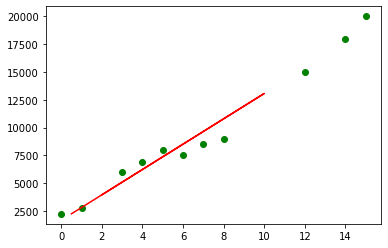

In [108]:
plt.scatter(x_train,y_train,color = 'g')
plt.plot(x_test,y_pred,color = 'r')
plt.show()

In [109]:
df

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


# 6. cost function / performance evaluation

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
mse = mean_squared_error(y_test,y_pred)

In [112]:
mse

92936.03395061752

### RMSE

In [113]:
np.sqrt(mse)

304.85411913014644

# R2

In [114]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,x,y,cv=4,scoring = 'r2').mean()

In [ ]:
# a higher R squared represents our model best fitted.
# a lower R squared represents our model is not best fitted

In [116]:
score*100

94.34129755621193

# mean absolute error

In [121]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)

In [123]:
mae

256.57407407407317

# Adjusted absolute error

In [128]:
adjusted_r2=1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

In [130]:
adjusted_r2 *100

97.56393827504583